In [11]:
import math
import mpmath
import fractions
import numpy as np
import matplotlib.pyplot as plt

In [419]:
#Chebyshev
aac = [1,30]
bbc = [2,3,5]

#Sylvester
aa1 = [1]
bb1 =[2,2]

aa2 = [1,6]
bb2 = [2,3,3]

#Hammond
aa3 = [1,12]
bb3 = [2,3,4]

#Sylvester
aa4 = [1]
bb4 = [2,3,6]

aa5 = [1,15]
bb5 = [2,3,5,30]

aa6 = [1,6,70]
bb6 = [2,3,5,7,210]

aa7 = [1,6,10,210,231,1155]
bb7 = [2,3,5,7,11,105]

aa8=[1, 6, 10, 14, 105]
bb8=[2, 3, 5, 7, 11, 13, 385, 1001]

#experiments
aax = [1,6,70]
bbx = [2,3,5,7,210]

#period of E(x)
def Eper(aa,bb):
    p = 1
    for a in aa+bb:
        g = fractions.gcd(p,a)
        p = p*a/g
    return p

#E(x) function
def ECheb(x,aa,bb):
    if x <= 0:
        return 0
    r = 0
    for a in aa:
        r += int(x/a)
    for b in bb:
        r -= int(x/b)
    return r

#E(x) for a period
def Elist(aa,bb):
    T = Eper(aa,bb)
    E = []
    for x in range(0,T+1):
        E.append(ECheb(x,aa,bb))
    return E

#nu coefficient
def nuCheb(x,aa,bb):
    return ECheb(x,aa,bb)-ECheb(x-1,aa,bb)

#outstanding terms and regular pairs in major and minor arrangements
def pairs(aa,bb):
    T = Eper(aa,bb)
    E = [1]
    for x in range(1,T+1):
        E.append(ECheb(x,aa,bb))
    maxE = max(E)
    minE = min(E)
    majo = [1]
    mino = [1]
    for i,e in enumerate(E):
        if e > E[majo[-1]]:
            majo.append(i)
    for i,e in enumerate(E):
        if e < E[mino[-1]]:
            mino.append(i)
    Emaj = E + E[1:majo[-1]+1]
    Emin = E + E[1:mino[-1]+1]
    minp = []
    minl = []
    majp = []
    majl = []
    for level in range(minE,maxE):
        b = True
        for i in range(mino[1],len(Emin)-1):
            if b:
                if Emin[i]<=level and Emin[i+1]>=level+1:
                    minp.append(i+1)
                    minl.append(level)
                    b = False
            if not b:
                if Emin[i]>=level+1 and Emin[i+1]<=level:
                    minp.append(i+1)
                    minl.append(level)
                    b = True
        b = True
        for i in range(1,len(Emaj)-1):
            if b:
                if Emaj[i]>=level+1 and Emaj[i+1]<=level:
                    majp.append(i+1)
                    majl.append(level)
                    b = False
            if not b:
                if Emaj[i]<=level and Emaj[i+1]>=level+1:
                    majp.append(i+1)
                    majl.append(level)
                    b = True
    return mino,majo,minp,majp,minl,majl

#generate pairs
def fgpairs(p,t,rho):
    r = []
    for i in range(0,len(p),2):
        a = p[i]
        b = p[i+1]
        while a*rho <= b:
            r.append(a)
            r.append(b)
            a += t
            b += t
    return r

#number of terms
def numterms(aa,bb,rho):
    T = Eper(aa,bb)
    mino,majo,minp,majp,minl,majl = pairs(aa,bb)
    minf = fgpairs(minp,T,rho)
    majf = fgpairs(majp,T,rho)
    return len(mino)+len(minf),len(majo)+len(majf)

#minor and major arrangements filtered
def minmajfil(aa,bb,rho):
    T = Eper(aa,bb)
    mino,majo,minp,majp,minl,majl = pairs(aa,bb)
    minf = fgpairs(minp,T,rho)
    majf = fgpairs(majp,T,rho)
    return mino,minf,majo,majf

#minor and major arrangements filtered, in tex format
def minmajtex(aa,bb,rho):
    T = Eper(aa,bb)
    mino,majo,minp,majp,minl,majl = pairs(aa,bb)
    minf = fgpairs(minp,T,rho)
    majf = fgpairs(majp,T,rho)
    up = "V(x)\leq\psi(x)"
    for i in range(1,len(majo)):
        up += "+\psi(x/"+str(majo[i])+")"
    for i in range(0,len(majf),2):
        up += "-\psi(x/"+str(majf[i])+")"
        up += "+\psi(x/"+str(majf[i+1])+")"
    low = "V(x)\geq\psi(x)"
    for i in range(1,len(mino)):
        low += "-\psi(x/"+str(mino[i])+")"
    for i in range(0,len(minf),2):
        low += "+\psi(x/"+str(minf[i])+")"
        low += "-\psi(x/"+str(minf[i+1])+")"
    return up,low


#alpha and beta, given minor and major pairs
def presol(mino,minf,majo,majf):
    b1 = 1.
    b2 = 1.
    a11 = 1.
    a12 = 0.
    for i in range(0,len(majf),2):
        a11 -= 1./majf[i]
        a12 += 1./majf[i+1]
    for i in range(1,len(majo)):
        a12 += 1./majo[i]
    a21 = 0.
    a22 = 1.
    for i in range(0,len(minf),2):
        a21 += 1./minf[i]
        a22 -= 1./minf[i+1]
    for i in range(1,len(mino)):
        a22 -= 1./mino[i]
    d = a11*a22 - a12*a21
    d1 = b1*a22 - b2*a12
    d2 = a11*b2 - a21*b1
    return d1/d,d2/d
    
#alpha and beta
def alphabeta(aa,bb,rho):
    T = Eper(aa,bb)
    mino,majo,minp,majp,minl,majl = pairs(aa,bb)
    minf = fgpairs(minp,T,rho)
    majf = fgpairs(majp,T,rho)
    return presol(mino,minf,majo,majf)

#eigenvalues
def eigvals(aa,bb,rho):
    T = Eper(aa,bb)
    mino,majo,minp,majp,minl,majl = pairs(aa,bb)
    minf = fgpairs(minp,T,rho)
    majf = fgpairs(majp,T,rho)
    a11 = 0.
    a12 = 0.
    for i in range(0,len(majf),2):
        a11 += 1./majf[i]
        a12 -= 1./majf[i+1]
    for i in range(1,len(majo)):
        a12 -= 1./majo[i]
    a21 = 0.
    a22 = 0.
    for i in range(0,len(minf),2):
        a21 -= 1./minf[i]
        a22 += 1./minf[i+1]
    for i in range(2,len(mino)):
        a22 += 1./mino[i]
    k = 1.*mino[1]/(mino[1]-1)
    a21 *= k
    a22 *= k
    p = .5*(a11 + a22)
    q = a11*a22 - a21*a12
    d = p*p - q
    r = []
    if d >= 0:
        dd = math.sqrt(d)
        r.append(p-dd)
        r.append(p+dd)
    return r

#stigmata coefficient
def stig(aa,bb):
    r = 0
    for a in aa:
        r -= math.log(a)/a
    for b in bb:
        r += math.log(b)/b
    return r

#Sylvester's procedure
def presylve(mino,minf,majo,majf,A):
    al,be = presol(mino,minf,majo,majf)
    return al*A,be*A

#Sylvester's procedure
def sylve(aa,bb,rho):
    al,be = alphabeta(aa,bb,rho)
    A = stig(aa,bb)
    return al*A,be*A

#upper bound from (1)-(n)
def bstig(aa,bb,n):
    return stig(aa,bb)*n/(n-1)

#lower bound from (1)+(m), (1)-(n)
def astig(aa,bb,n,m):
    return stig(aa,bb)*(1-n/(m*(n-1.)))

In [24]:
Eper(aa8,bb8)

30030

In [7]:
stig(aa6,bb6)

0.9787954825763857

In [8]:
bstig(aa6,bb6,10)

1.087550536195984

In [9]:
astig(aa6,bb6,10,13)

0.8951377490228485

In [402]:
mino,minf,majo,majf=minmajfil(aa6,bb6,1.1)
mino,minf,majo,majf

([1, 10],
 [11, 15, 17, 21, 23, 28, 31, 35, 71, 100, 281, 310, 137, 190, 347, 400],
 [1, 13],
 [10, 11, 15, 17, 14, 19, 20, 73, 230, 283, 440, 493, 110, 139])

In [422]:
s=minmajtex(aa5,bb5,1.2)
print(s[0])
print(s[1])

V(x)\leq\psi(x)+\psi(x/17)-\psi(x/24)+\psi(x/29)-\psi(x/30)+\psi(x/47)-\psi(x/60)+\psi(x/77)
V(x)\geq\psi(x)-\psi(x/6)+\psi(x/7)-\psi(x/10)+\psi(x/13)-\psi(x/30)+\psi(x/43)-\psi(x/60)+\psi(x/73)-\psi(x/90)


In [427]:
f = open("clip.txt","w") 
s=minmajtex(aa6,bb6,1.1)
print(s[0])
print(s[1])
f.write(s[0])
f.write(s[1])
f.close()

V(x)\leq\psi(x)+\psi(x/13)-\psi(x/10)+\psi(x/11)-\psi(x/15)+\psi(x/17)-\psi(x/14)+\psi(x/19)-\psi(x/20)+\psi(x/73)-\psi(x/230)+\psi(x/283)-\psi(x/440)+\psi(x/493)-\psi(x/110)+\psi(x/139)
V(x)\geq\psi(x)-\psi(x/10)+\psi(x/11)-\psi(x/15)+\psi(x/17)-\psi(x/21)+\psi(x/23)-\psi(x/28)+\psi(x/31)-\psi(x/35)+\psi(x/71)-\psi(x/100)+\psi(x/281)-\psi(x/310)+\psi(x/137)-\psi(x/190)+\psi(x/347)-\psi(x/400)


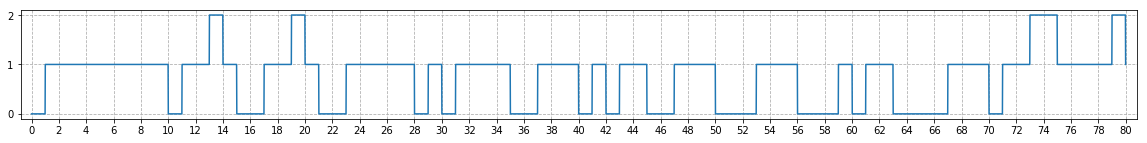

In [400]:
n=80
xres=np.linspace(0,n,5000)
fig = plt.figure(figsize=(20,2))
ax = fig.gca()
plt.plot(xres,[ECheb(x,aa6,bb6) for x in xres])
plt.margins(.01,.05)
ax.set_xticks(np.arange(0, n+.1, 2))
ax.set_yticks(np.arange(0, 2.1, 1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("EE5.png", dpi=200)
plt.show()

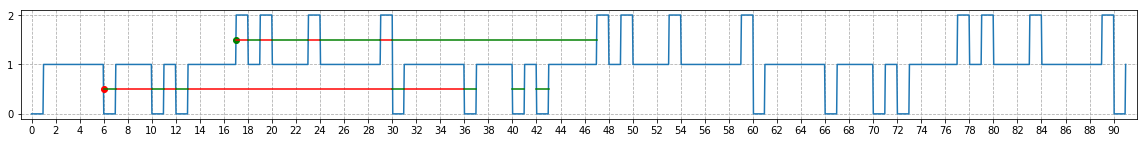

In [186]:
aa=aa5
bb=bb5
E = Elist(aa,bb)
T = len(E)-1
mino,majo,minp,majp,minl,majl=pairs(aa,bb)
n1 = 0
n2 = 91
xres=np.linspace(n1,n2,2000)
fig = plt.figure(figsize=(20,2))
ax = fig.gca()
plt.plot(xres,[E[int(x)%T] for x in xres])
for i in range(1,len(mino)):
    if n1 < mino[i] and mino[i] < n2:
        plt.plot([mino[i]],[1.5-i],'ro')
for i in range(1,len(majo)):
    if n1 < majo[i] and majo[i] < n2:
        plt.plot([majo[i]],[.5+i],'go')
for i in range(0,len(minp),2):
    m1 = max(n1,minp[i])
    m2 = min(n2,minp[i+1])
    if m1 < m2:
        plt.plot([m1,m2],[minl[i]+.5,minl[i]+.5],'r-')
for i in range(0,len(majp)-1,2):
    m1 = max(n1,majp[i])
    m2 = min(n2,majp[i+1])
    if m1 < m2:
        plt.plot([m1,m2],[majl[i]+.5,majl[i]+.5],'g-')
plt.margins(.01,.05)
ax.set_xticks(np.arange(n1, n2+.1, 2))
ax.set_yticks(np.arange(0, 2.1, 1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("nu5.png", dpi=200)
plt.show()

In [229]:
aa=aa7
bb=bb7
rho=1.1
E = Elist(aa,bb)
T = len(E)-1
mino,majo,minp,majp,minl,majl=pairs(aa,bb)
print(fgpairs(minp,T,rho))
print(fgpairs(majp,T,rho))

[617, 826, 827, 946, 1079, 1365, 1367, 1575, 1607, 1785, 2297, 2926, 4607, 5236, 113, 126, 227, 315, 457, 525, 17, 22, 23, 28, 29, 35, 37, 45, 47, 56, 59, 66, 79, 88, 89, 99, 19, 21]
[15, 17, 110, 131, 195, 223, 315, 349, 14, 19, 21, 31, 33, 41, 44, 53, 55, 61, 63, 73, 75, 83, 84, 97, 105, 241, 315, 481, 525, 703, 735, 943, 945, 1231, 1484, 1693, 1694, 2323, 4004, 4633]


In [288]:
presol(aa4,bb4,1.5)

(0.7868670005564831, 1.183453904655908)

In [290]:
4242./5391,6380./5391

(0.7868670005564831, 1.183453904655908)

In [233]:
sylve(aa7,bb7,1.1)

(0.9458549918142963, 1.0552334892526647)

In [254]:
sylve(aa6,bb6,1.11)

(0.9444623254310497, 1.0558009221528362)

In [242]:
sylve(aa5,bb5,1.1)

(0.8964860108863035, 1.1019265622296193)

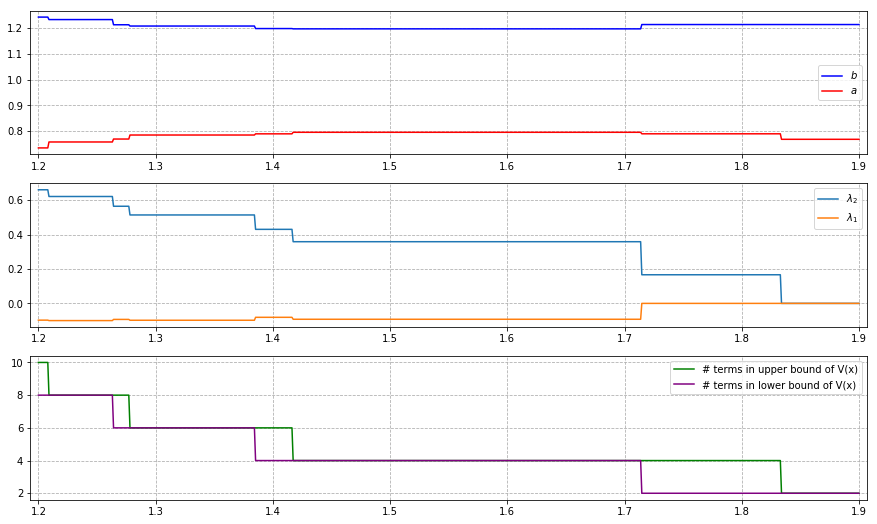

max a = 0.79584064012 at rho = 1.41731044349
min b = 1.19695032625 at rho = 1.41731044349


In [357]:
r1=1.2
r2=1.9
d=.001
n=(r2-r1)/d
aa=aa4
bb=bb4
rlist=np.linspace(r1,r2,n+1)
plt.figure(figsize=(15,9))
ax = plt.subplot(3,1,1)
ab = [sylve(aa,bb,r) for r in rlist]
eig = [eigvals(aa,bb,r) for r in rlist]
nt = [numterms(aa,bb,r) for r in rlist]
plt.plot(rlist,[e[1] for e in ab],'b',label='$b$')
plt.plot(rlist,[e[0] for e in ab],'r',label='$a$')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,2)
plt.plot(rlist,[e[1] for e in eig],label='$\lambda_2$')
plt.plot(rlist,[e[0] for e in eig],label='$\lambda_1$')
#plt.plot(rlist,[1 for r in rlist],'--')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,3)
plt.plot(rlist,[e[1] for e in nt],'g',label='# terms in upper bound of V(x)')
plt.plot(rlist,[e[0] for e in nt],'purple',label='# terms in lower bound of V(x)')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
#plt.savefig("E4ab.png", dpi=200, bbox_inches='tight')
plt.show()
a = [e[0] for e in ab]
b = [e[1] for e in ab]
print("max a = "+str(max(a))+" at rho = "+str(rlist[np.argmax(a)]))
print("min b = "+str(min(b))+" at rho = "+str(rlist[np.argmin(b)]))

In [316]:
sylve(aa,bb,1.5)

(0.7958406401203091, 1.196950326253553)

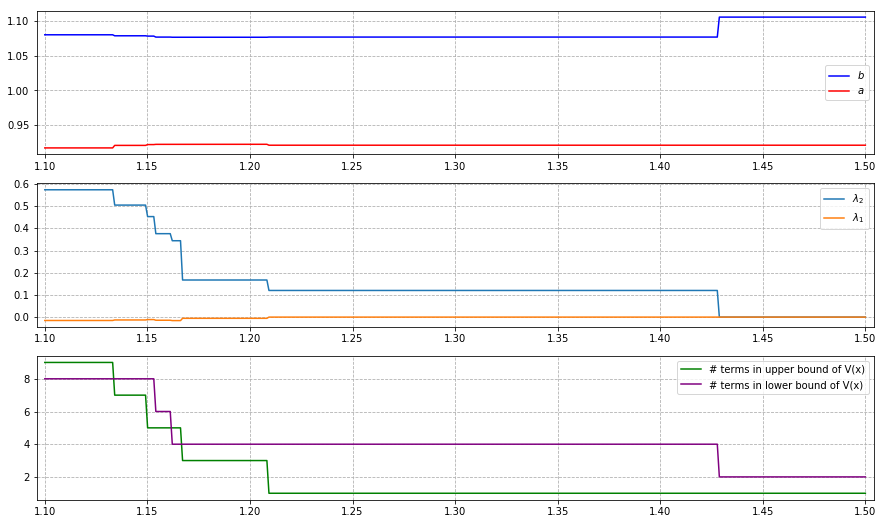

max a = 0.922610760903 at rho = 1.1671679198
min b = 1.07657793499 at rho = 1.1671679198


In [359]:
r1=1.1
r2=1.5
d=.001
n=(r2-r1)/d
aa=aac
bb=bbc
rlist=np.linspace(r1,r2,n+1)
plt.figure(figsize=(15,9))
ax = plt.subplot(3,1,1)
ab = [sylve(aa,bb,r) for r in rlist]
eig = [eigvals(aa,bb,r) for r in rlist]
nt = [numterms(aa,bb,r) for r in rlist]
plt.plot(rlist,[e[1] for e in ab],'b',label='$b$')
plt.plot(rlist,[e[0] for e in ab],'r',label='$a$')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,2)
plt.plot(rlist,[e[1] for e in eig],label='$\lambda_2$')
plt.plot(rlist,[e[0] for e in eig],label='$\lambda_1$')
#plt.plot(rlist,[1 for r in rlist],'--')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,3)
plt.plot(rlist,[e[1] for e in nt],'g',label='# terms in upper bound of V(x)')
plt.plot(rlist,[e[0] for e in nt],'purple',label='# terms in lower bound of V(x)')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
#plt.savefig("ECab.png", dpi=200, bbox_inches='tight')
plt.show()
a = [e[0] for e in ab]
b = [e[1] for e in ab]
print("max a = "+str(max(a))+" at rho = "+str(rlist[np.argmax(a)]))
print("min b = "+str(min(b))+" at rho = "+str(rlist[np.argmin(b)]))

In [343]:
sylve(aa,bb,1.2)

(0.9226107609029566, 1.0765779349939633)

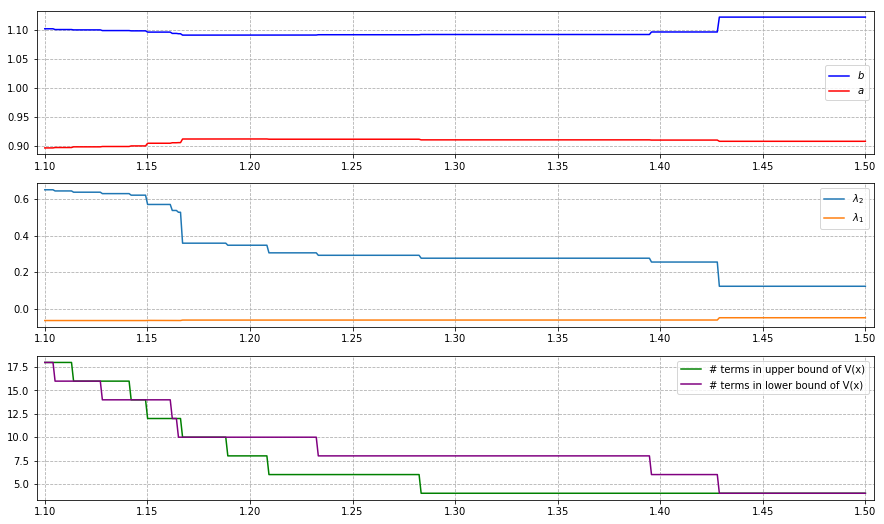

max a = 0.911918158547 at rho = 1.18922305764
min b = 1.09097975166 at rho = 1.18922305764


In [370]:
r1=1.1
r2=1.5
d=.001
n=(r2-r1)/d
aa=aa5
bb=bb5
rlist=np.linspace(r1,r2,n+1)
plt.figure(figsize=(15,9))
ax = plt.subplot(3,1,1)
ab = [sylve(aa,bb,r) for r in rlist]
eig = [eigvals(aa,bb,r) for r in rlist]
nt = [numterms(aa,bb,r) for r in rlist]
plt.plot(rlist,[e[1] for e in ab],'b',label='$b$')
plt.plot(rlist,[e[0] for e in ab],'r',label='$a$')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,2)
plt.plot(rlist,[e[1] for e in eig],label='$\lambda_2$')
plt.plot(rlist,[e[0] for e in eig],label='$\lambda_1$')
#plt.plot(rlist,[1 for r in rlist],'--')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,3)
plt.plot(rlist,[e[1] for e in nt],'g',label='# terms in upper bound of V(x)')
plt.plot(rlist,[e[0] for e in nt],'purple',label='# terms in lower bound of V(x)')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
"plt.savefig("E5ab.png", dpi=200, bbox_inches='tight')
plt.show()
a = [e[0] for e in ab]
b = [e[1] for e in ab]
print("max a = "+str(max(a))+" at rho = "+str(rlist[np.argmax(a)]))
print("min b = "+str(min(b))+" at rho = "+str(rlist[np.argmin(b)]))

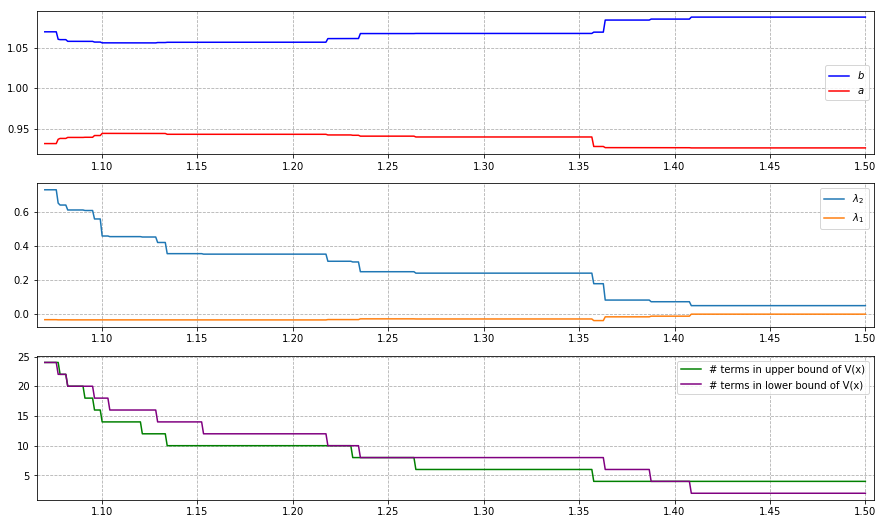

max a = 0.944462325431 at rho = 1.10407925408
min b = 1.05580092215 at rho = 1.10407925408


In [360]:
r1=1.07
r2=1.5
d=.001
n=(r2-r1)/d
aa=aa6
bb=bb6
rlist=np.linspace(r1,r2,n+1)
plt.figure(figsize=(15,9))
ax = plt.subplot(3,1,1)
ab = [sylve(aa,bb,r) for r in rlist]
eig = [eigvals(aa,bb,r) for r in rlist]
nt = [numterms(aa,bb,r) for r in rlist]
plt.plot(rlist,[e[1] for e in ab],'b',label='$b$')
plt.plot(rlist,[e[0] for e in ab],'r',label='$a$')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,2)
plt.plot(rlist,[e[1] for e in eig],label='$\lambda_2$')
plt.plot(rlist,[e[0] for e in eig],label='$\lambda_1$')
#plt.plot(rlist,[1 for r in rlist],'--')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,3)
plt.plot(rlist,[e[1] for e in nt],'g',label='# terms in upper bound of V(x)')
plt.plot(rlist,[e[0] for e in nt],'purple',label='# terms in lower bound of V(x)')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
#plt.savefig("E6ab.png", dpi=200, bbox_inches='tight')
plt.show()
a = [e[0] for e in ab]
b = [e[1] for e in ab]
print("max a = "+str(max(a))+" at rho = "+str(rlist[np.argmax(a)]))
print("min b = "+str(min(b))+" at rho = "+str(rlist[np.argmin(b)]))

In [430]:
sylve(aa6,bb6,1.1),sylve(aa6,bb6,1.105),sylve(aa6,bb6,1.106)

((0.9418067343211206, 1.056825103147896),
 (0.9444623254310497, 1.0558009221528362),
 (0.9444623254310497, 1.0558009221528362))

In [397]:
mino,minf,majo,majf=minmajfil(aa6,bb6,1.105)
minf,majf

([11, 15, 17, 21, 23, 28, 31, 35, 71, 100, 137, 190, 347, 400],
 [15, 17, 14, 19, 20, 73, 230, 283, 440, 493, 110, 139])

In [429]:
mino,minf,majo,majf=minmajfil(aa6,bb6,1.1)
minf,majf

([11, 15, 17, 21, 23, 28, 31, 35, 71, 100, 281, 310, 137, 190, 347, 400],
 [10, 11, 15, 17, 14, 19, 20, 73, 230, 283, 440, 493, 110, 139])

In [379]:
493./440,310./281

(1.1204545454545454, 1.103202846975089)

In [394]:
presylve(mino,[11, 15, 17, 21, 23, 28, 31, 35, 71, 100, 137, 190, 347, 400],majo,[10,11,15, 17, 14, 19, 20, 73, 230, 283, 110, 139],stig(aa6,bb6))

(0.9418541449299143, 1.0567265791712268)

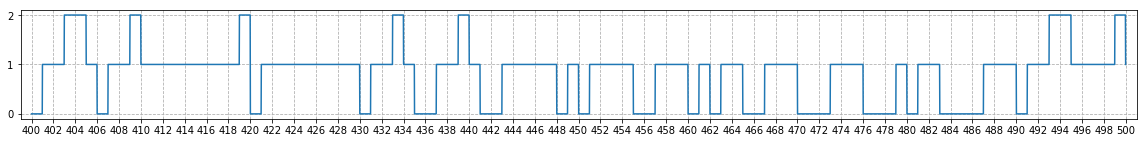

In [377]:
n1=400
n2=500
xres=np.linspace(n1,n2,5000)
fig = plt.figure(figsize=(20,2))
ax = fig.gca()
plt.plot(xres,[ECheb(x,aa6,bb6) for x in xres])
plt.margins(.01,.05)
ax.set_xticks(np.arange(n1, n2+.1, 2))
ax.set_yticks(np.arange(0, 2.1, 1))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("EEE6.png", dpi=200)
plt.show()

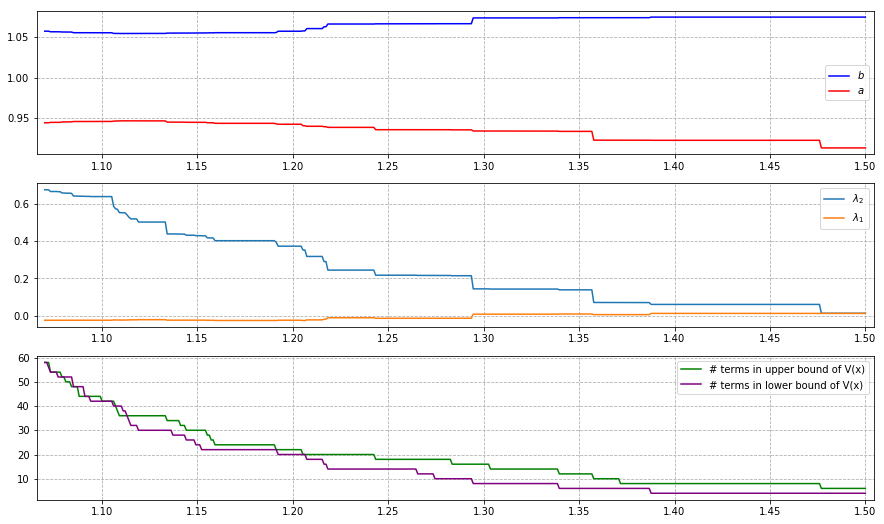

max a = 0.946585344584 at rho = 1.1131002331
min b = 1.05430970465 at rho = 1.1131002331


In [367]:
r1=1.07
r2=1.5
d=.001
n=(r2-r1)/d
aa=aa7
bb=bb7
rlist=np.linspace(r1,r2,n+1)
plt.figure(figsize=(15,9))
ax = plt.subplot(3,1,1)
ab = [sylve(aa,bb,r) for r in rlist]
eig = [eigvals(aa,bb,r) for r in rlist]
nt = [numterms(aa,bb,r) for r in rlist]
plt.plot(rlist,[e[1] for e in ab],'b',label='$b$')
plt.plot(rlist,[e[0] for e in ab],'r',label='$a$')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,2)
plt.plot(rlist,[e[1] for e in eig],label='$\lambda_2$')
plt.plot(rlist,[e[0] for e in eig],label='$\lambda_1$')
#plt.plot(rlist,[1 for r in rlist],'--')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,3)
plt.plot(rlist,[e[1] for e in nt],'g',label='# terms in upper bound of V(x)')
plt.plot(rlist,[e[0] for e in nt],'purple',label='# terms in lower bound of V(x)')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
#plt.savefig("E7ab.png", dpi=200, bbox_inches='tight')
plt.show()
a = [e[0] for e in ab]
b = [e[1] for e in ab]
print("max a = "+str(max(a))+" at rho = "+str(rlist[np.argmax(a)]))
print("min b = "+str(min(b))+" at rho = "+str(rlist[np.argmin(b)]))

In [438]:
sylve(aa7,bb7,1.1),sylve(aa7,bb7,1.113)

((0.9458549918142963, 1.0552334892526647),
 (0.9465853445835812, 1.054309704652368))

In [432]:
f = open("clip7.txt","w") 
s=minmajtex(aa7,bb7,1.12)
print(s[0])
print(s[1])
f.write(s[0])
f.write("\n")
f.write(s[1])
f.close()

V(x)\leq\psi(x)+\psi(x/13)-\psi(x/15)+\psi(x/17)-\psi(x/110)+\psi(x/131)-\psi(x/195)+\psi(x/223)-\psi(x/14)+\psi(x/19)-\psi(x/21)+\psi(x/31)-\psi(x/33)+\psi(x/41)-\psi(x/44)+\psi(x/53)-\psi(x/63)+\psi(x/73)-\psi(x/84)+\psi(x/97)-\psi(x/105)+\psi(x/241)-\psi(x/315)+\psi(x/481)-\psi(x/525)+\psi(x/703)-\psi(x/735)+\psi(x/943)-\psi(x/945)+\psi(x/1231)-\psi(x/1484)+\psi(x/1693)-\psi(x/1694)+\psi(x/2323)-\psi(x/4004)+\psi(x/4633)
V(x)\geq\psi(x)-\psi(x/15)-\psi(x/105)-\psi(x/616)+\psi(x/617)-\psi(x/826)+\psi(x/827)-\psi(x/946)+\psi(x/1079)-\psi(x/1365)+\psi(x/1367)-\psi(x/1575)+\psi(x/2297)-\psi(x/2926)+\psi(x/4607)-\psi(x/5236)+\psi(x/227)-\psi(x/315)+\psi(x/457)-\psi(x/525)+\psi(x/17)-\psi(x/22)+\psi(x/23)-\psi(x/28)+\psi(x/29)-\psi(x/35)+\psi(x/37)-\psi(x/45)+\psi(x/47)-\psi(x/56)


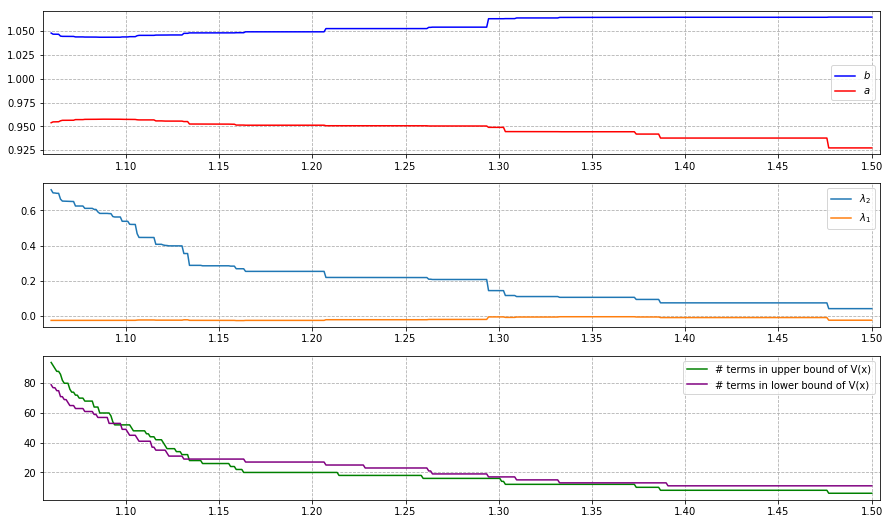

max a = 0.957600908465 at rho = 1.08605922551
min b = 1.04352119257 at rho = 1.08605922551


In [368]:
r1=1.06
r2=1.5
d=.001
n=(r2-r1)/d
aa=aa8
bb=bb8
rlist=np.linspace(r1,r2,n+1)
plt.figure(figsize=(15,9))
ax = plt.subplot(3,1,1)
ab = [sylve(aa,bb,r) for r in rlist]
eig = [eigvals(aa,bb,r) for r in rlist]
nt = [numterms(aa,bb,r) for r in rlist]
plt.plot(rlist,[e[1] for e in ab],'b',label='$b$')
plt.plot(rlist,[e[0] for e in ab],'r',label='$a$')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,2)
plt.plot(rlist,[e[1] for e in eig],label='$\lambda_2$')
plt.plot(rlist,[e[0] for e in eig],label='$\lambda_1$')
#plt.plot(rlist,[1 for r in rlist],'--')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
ax = plt.subplot(3,1,3)
plt.plot(rlist,[e[1] for e in nt],'g',label='# terms in upper bound of V(x)')
plt.plot(rlist,[e[0] for e in nt],'purple',label='# terms in lower bound of V(x)')
plt.margins(.01,.05)
#ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.legend()
#plt.savefig("E8ab.png", dpi=200, bbox_inches='tight')
plt.show()
a = [e[0] for e in ab]
b = [e[1] for e in ab]
print("max a = "+str(max(a))+" at rho = "+str(rlist[np.argmax(a)]))
print("min b = "+str(min(b))+" at rho = "+str(rlist[np.argmin(b)]))

In [441]:
sylve(aa8,bb8,1.09)

(0.9576009084653562, 1.0435211925716936)

In [442]:
f = open("clip8.txt","w") 
s=minmajtex(aa8,bb8,1.09)
print(s[0])
print(s[1])
f.write(s[0])
f.write("\n")
f.write(s[1])
f.close()

V(x)\leq\psi(x)+\psi(x/19)+\psi(x/229)+\psi(x/1891)-\psi(x/15)+\psi(x/17)-\psi(x/26)+\psi(x/29)-\psi(x/65)+\psi(x/71)-\psi(x/21)+\psi(x/31)-\psi(x/33)+\psi(x/43)-\psi(x/44)+\psi(x/61)-\psi(x/63)+\psi(x/73)-\psi(x/75)+\psi(x/103)-\psi(x/385)+\psi(x/421)-\psi(x/242)+\psi(x/271)-\psi(x/285)+\psi(x/323)-\psi(x/385)+\psi(x/439)-\psi(x/440)+\psi(x/493)-\psi(x/494)+\psi(x/571)-\psi(x/770)+\psi(x/841)-\psi(x/1155)+\psi(x/1273)-\psi(x/3080)+\psi(x/3361)-\psi(x/1924)+\psi(x/3001)-\psi(x/3003)+\psi(x/3781)-\psi(x/4004)+\psi(x/4861)-\psi(x/5005)+\psi(x/6511)-\psi(x/6864)+\psi(x/7981)-\psi(x/7995)+\psi(x/8821)-\psi(x/8853)+\psi(x/9931)-\psi(x/10725)+\psi(x/11933)-\psi(x/11934)+\psi(x/13441)-\psi(x/13442)+\psi(x/14923)-\psi(x/17654)+\psi(x/19951)
V(x)\geq\psi(x)-\psi(x/15)-\psi(x/66)+\psi(x/67)-\psi(x/78)+\psi(x/79)-\psi(x/418)+\psi(x/419)-\psi(x/2068)+\psi(x/2081)-\psi(x/3135)+\psi(x/3149)-\psi(x/5005)+\psi(x/5039)-\psi(x/7007)+\psi(x/7349)-\psi(x/8086)+\psi(x/8087)-\psi(x/9009)+\psi(x/9011)-\psi(x

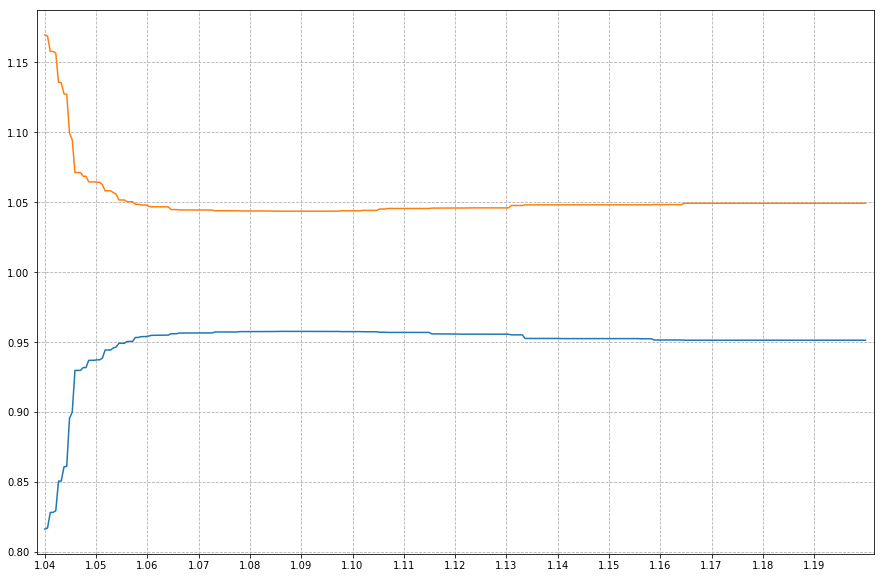

(0.9576009084653562, 1.0435211925716936)

In [271]:
r1=1.04
r2=1.2
rlist=np.linspace(r1,r2,300)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ab = [sylve(aa7,bb7,r) for r in rlist]
plt.plot(rlist,ab)
plt.margins(.01,.05)
ax.set_xticks(np.arange(r1, r2, .01))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("EE5.png", dpi=200)
plt.show()
a = [e[0] for e in ab]
b = [e[1] for e in ab]
max(a),min(b)

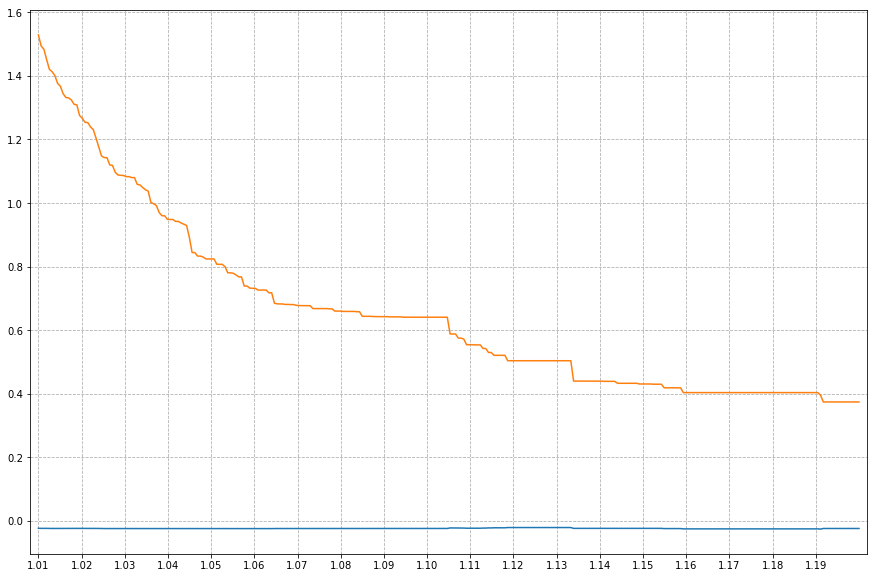

In [268]:
r1=1.01
r2=1.2
rlist=np.linspace(r1,r2,300)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
plt.plot(rlist,[eigvals(aa7,bb7,r) for r in rlist])
plt.margins(.01,.05)
ax.set_xticks(np.arange(r1, r2, .01))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("EE5.png", dpi=200)
plt.show()

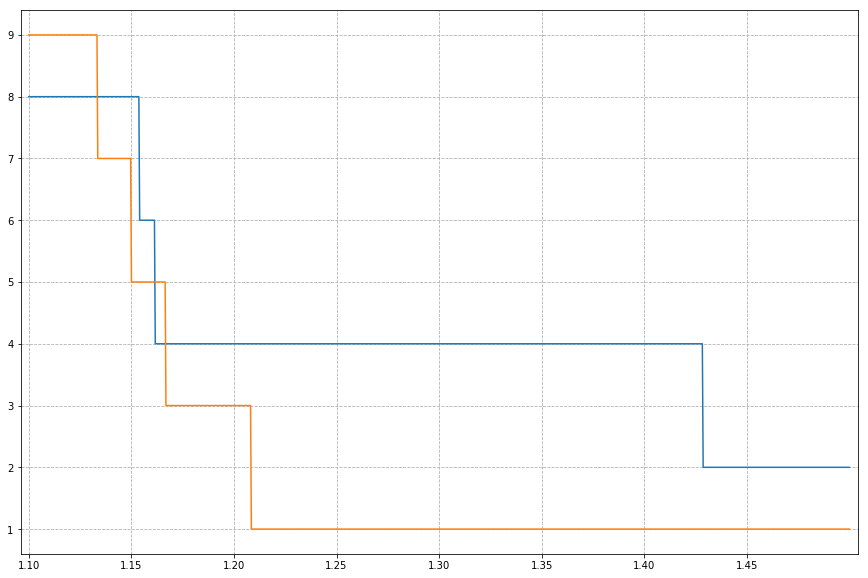

In [285]:
r1=1.1
r2=1.5
rlist=np.linspace(r1,r2,1000)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
plt.plot(rlist,[numterms(aac,bbc,r) for r in rlist])
plt.margins(.01,.05)
ax.set_xticks(np.arange(r1, r2, .05))
#ax.set_yticks(np.arange(0.8, 1.3, .01))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("EE5.png", dpi=200)
plt.show()